In [1]:
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# This command tells python to use seaborn for its styling.
sns.set()

# Making the charts appear in the notebook instead of in a new window.
%matplotlib inline

# Linear Regression #

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

### Variables ###

Annual_Inflation = 0.03
Economic_Growth = 0.025



In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,7/19/2017 0:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,9/23/2016 0:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,11/17/2016 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,9/23/2016 0:00
4,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,11/7/2016 0:00


In [3]:
# Identify which columns have null values. 
df.isnull().sum() 
((df.isnull().sum() / len(df)) * 100).round(2)


BOROUGH                            0.00
NEIGHBORHOOD                       0.00
BUILDING CLASS CATEGORY            0.00
TAX CLASS AT PRESENT               0.00
BLOCK                              0.00
LOT                                0.00
EASE-MENT                          0.00
BUILDING CLASS AT PRESENT          0.00
ADDRESS                            0.00
APARTMENT NUMBER                   0.00
ZIP CODE                           0.00
RESIDENTIAL UNITS                  0.00
COMMERCIAL UNITS                   0.00
TOTAL UNITS                        0.00
LAND SQUARE FEET                  33.23
GROSS SQUARE FEET                 35.06
YEAR BUILT                         0.00
TAX CLASS AT TIME OF SALE          0.00
BUILDING CLASS AT TIME OF SALE     0.00
SALE PRICE                        15.43
SALE DATE                          0.00
dtype: float64

In [4]:
n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

# Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()

Number of duplicate rows are 380.


In [5]:
# Remove any row that has a null value in it. 
df = df.dropna()

cols_to_select = ['ADDRESS','ZIP CODE', 'LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE','TAX CLASS AT PRESENT']
df[cols_to_select]

,ADDRESS,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,TAX CLASS AT PRESENT
0,153 AVENUE B,10009,1633.0,6440.0,6625000.0,2A
1,154 EAST 7TH STREET,10009,2272.0,6794.0,3936272.0,2B
2,301 EAST 10TH STREET,10009,2369.0,4615.0,8000000.0,2A
3,210 AVENUE B,10009,1750.0,4226.0,3192840.0,2B
4,629 EAST 5TH STREET,10009,4489.0,18523.0,16232000.0,2
...,...,...,...,...,...,...
69293,37 QUAIL LANE,10309,2400.0,2575.0,450000.0,1
69294,32 PHEASANT LANE,10309,2498.0,2377.0,550000.0,1
69295,49 PITNEY AVENUE,10309,4000.0,1496.0,460000.0,1
69296,2730 ARTHUR KILL ROAD,10309,208033.0,64117.0,11693337.0,4


In [6]:
print (df.dtypes)


BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object


In [7]:
n_dupes = df.duplicated().sum()
null=df.isnull().sum()
print("Number of duplicate rows are %i." % n_dupes)
null

Number of duplicate rows are 0.


BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36934 entries, 0 to 69297
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         36934 non-null  int64  
 1   NEIGHBORHOOD                    36934 non-null  object 
 2   BUILDING CLASS CATEGORY         36934 non-null  object 
 3   TAX CLASS AT PRESENT            36934 non-null  object 
 4   BLOCK                           36934 non-null  int64  
 5   LOT                             36934 non-null  int64  
 6   EASE-MENT                       36934 non-null  object 
 7   BUILDING CLASS AT PRESENT       36934 non-null  object 
 8   ADDRESS                         36934 non-null  object 
 9   APARTMENT NUMBER                36934 non-null  object 
 10  ZIP CODE                        36934 non-null  int64  
 11  RESIDENTIAL UNITS               36934 non-null  int64  
 12  COMMERCIAL UNITS                

In [9]:

df['price sqft'] = df['SALE PRICE']/df['GROSS SQUARE FEET']
df['age'] = 2021 - df['YEAR BUILT']
col=['ZIP CODE','YEAR BUILT','age','GROSS SQUARE FEET','SALE PRICE','price sqft']
df[col]

,ZIP CODE,YEAR BUILT,age,GROSS SQUARE FEET,SALE PRICE,price sqft
0,10009,1900,121,6440.0,6625000.0,1028.726708
1,10009,1913,108,6794.0,3936272.0,579.374742
2,10009,1900,121,4615.0,8000000.0,1733.477790
3,10009,1920,101,4226.0,3192840.0,755.522953
4,10009,1920,101,18523.0,16232000.0,876.315932
...,...,...,...,...,...,...
69293,10309,1998,23,2575.0,450000.0,174.757282
69294,10309,1998,23,2377.0,550000.0,231.384098
69295,10309,1925,96,1496.0,460000.0,307.486631
69296,10309,2001,20,64117.0,11693337.0,182.374986


In [10]:
df['ZIP CODE'].value_counts()


11201    1043
10314     842
11235     796
10312     741
11234     733
         ... 
10803       1
11005       1
10006       1
10044       1
10167       1
Name: ZIP CODE, Length: 179, dtype: int64

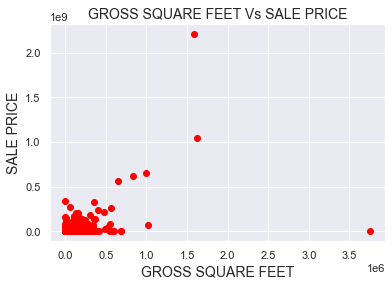

In [11]:
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], color='red')
plt.title('GROSS SQUARE FEET Vs SALE PRICE', fontsize=14)
plt.xlabel('GROSS SQUARE FEET', fontsize=14)
plt.ylabel('SALE PRICE', fontsize=14)
plt.grid(True)
plt.show()

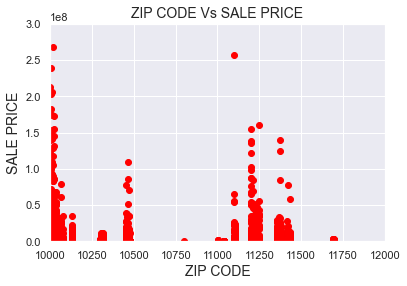

In [12]:
plt.scatter(df['ZIP CODE'], df['SALE PRICE'], color='red')
plt.title('ZIP CODE Vs SALE PRICE', fontsize=14)
plt.xlabel('ZIP CODE', fontsize=14)
plt.xlim([10000, 12000])
plt.ylim([0,300000000])
plt.ylabel('SALE PRICE', fontsize=14)
plt.grid(True)
plt.show()

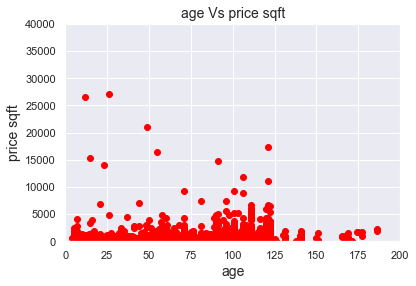

In [13]:
plt.scatter(df['age'], df['price sqft'], color='red')
plt.title('age Vs price sqft', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.xlim([0, 200])
plt.ylim([0,40000])
plt.ylabel('price sqft', fontsize=14)
plt.grid(True)
plt.show()

In [14]:
selected_features = ['GROSS SQUARE FEET','ZIP CODE','YEAR BUILT']
#selected_features = ['GROSS SQUARE FEET']

In [15]:
#define x and y for the predictor
# y is what we are trying to predict, and X is what we are using to make that prediction.

x = df[selected_features]
y = df['SALE PRICE']

In [16]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2)
print('Lenght of our Training data:', x_train.shape, '\nLength of our Testing data:', x_test.shape)
print('Lenght of our Training data:', y_train.shape, '\nLength of our Testing data:', y_test.shape)

Lenght of our Training data: (29547, 3) 
Length of our Testing data: (7387, 3)
Lenght of our Training data: (29547,) 
Length of our Testing data: (7387,)


In [17]:
#y_train=y_train.reshape((29547,1))

In [18]:
# instantiate, fit
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)


LinearRegression()

In [19]:
print (regr.intercept_)
print (regr.coef_) 

3355953.9444566797
[ 290.07747762 -212.7508033  -236.96641568]


In [32]:
# prediction with sklearn
Size = 2575
zipcode = 10309
Year = 2021
print ('Predicted Property Price: \n', regr.predict([[Size, zipcode,Year]]))
y_pred=regr.predict([[Size, zipcode,Year]])
y_pred[0]*5*Annual_Inflation+y_pred[0]*5*Economic_Growth+y_pred[0]

Predicted Property Price: 
 [1430746.29203949]


1824201.522350351

In [27]:
import pickle


In [28]:
pickle.dump(regr, open('model.pkl', 'wb'))

In [30]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict([[Size, zipcode,Year]])

array([1430746.29203949])